# Install dependencies

In [15]:
!pip install -r requirements.txt

# Preprocessing the data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataset=pd.read_csv('bitcoin_prices_train.csv')

training_set=dataset.iloc[:,1:2]        #selecting the second column
training_set.head()                          #print rows

,Open
0,465.864014
1,456.859985
2,424.102997
3,394.673004
4,408.084991


In [9]:
training_set=training_set.values            #converting to 2d array
training_set                                 #print the whole data

array([[ 465.864014],
       [ 456.859985],
       [ 424.102997],
       ...,
       [3822.469971],
       [4269.004395],
       [4289.088867]])

In [10]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()                           #scaling using 
training_set = sc.fit_transform(training_set)
x_train=training_set[0:1535]                  #input values of rows		   
y_train=training_set[1:1536]                  #input values of rows

today_prices=pd.DataFrame(x_train)               #assigning the values of x_train to today
tomorrow_prices=pd.DataFrame(y_train)            #assigning the values of x_train to tomorrow
ex= pd.concat([today_prices,tomorrow_prices],axis=1)        #concat two columns 
ex.columns=(['today_prices','tomorrow_prices'])
x_train = np.reshape(x_train, (1535, 1, 1))     #Reshaping for Keras

# Building RNN

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1535/1535 [==============================] - 6s 4ms/step - loss: 0.0391
Epoch 2/100
1535/1535 [==============================] - 2s 1ms/step - loss: 0.0037
Epoch 3/100
1535/1535 [==============================] - 2s 1ms/step - loss: 5.9316e-04
Epoch 4/100
1535/1535 [==============================] - 2s 1ms/step - loss: 4.7348e-04
Epoch 5/100
1535/1535 [==============================] - 2s 1ms/step - loss: 5.7233e-04
Epoch 6/100
1535/1535 [==============================] - 2s 1ms/step - loss: 5.5314e-04
Epoch 7/100
1535/1535 [==============================] - 2s 1ms/step - loss: 4.3714e-04A: 0s - loss: 4.3650e-
Epoch 8/100
1535/1535 [==============================] - 2s 1ms/step - loss: 5.0632e-04A: 0s - loss: 4.684
Epoch 9/100
1535/1535 [=====

# Predictions

In [13]:
# Reading CSV file into test set
test_set = pd.read_csv('bitcoin_prices_test.csv')
test_set.head()


real_bitcoin_price = test_set.iloc[:,1:2]         #selecting the second column

real_bitcoin_price = real_bitcoin_price.values      #converting to 2D array

#getting the predicted Bitcoin value of the first week of Jan 2019  
inputs = real_bitcoin_price			
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_bitcoin_price = regressor.predict(inputs)
predicted_bitcoin_price = sc.inverse_transform(predicted_bitcoin_price)

# Visualising the result

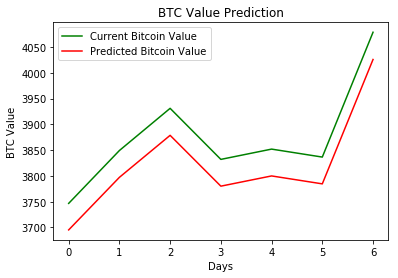

In [15]:
plt.plot(real_bitcoin_price, color = 'green', label = 'Current Bitcoin Value')
plt.plot(predicted_bitcoin_price, color = 'red', label = 'Predicted Bitcoin Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()